In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **데이터 전처리**

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import re
import urllib.request

In [3]:
import pandas as pd

# df = pd.read_csv('/content/drive/MyDrive/AIFFELTHON/AIFFELTHON_BBC/no_nan_qna_set.csv', index_col=0)
# df = pd.read_table('/content/drive/MyDrive/AIFFELTHON/AIFFELTHON_BBC/moonee_qna_set.txt', sep=',', index_col=0)
df = pd.read_csv('/content/drive/MyDrive/AIFFELTHON/qna_for_git.csv', index_col=0)
# df.head()

In [4]:
sub_type_mapping = {
    'type_1': 0,
    'type_2': 1,
    'type_3': 2,
    'type_4': 3,
    'type_5': 4,
    'type_6': 5,
    'type_7': 6,
    'type_8': 7,
    'type_9': 8,
    'type_10': 9,
    'type_11': 10,
    'type_12': 11,
    'type_13': 12,
    'type_14': 13,
    'type_15': 14,
    'type_16': 15,
    'type_17': 16,
    'type_18': 17,
    'type_19': 18,
    'type_20': 19,
    'type_21': 20
}

func = lambda x: sub_type_mapping.get(x, x)

In [5]:
df['sub_type'] = df['sub_type'].map(func)

In [6]:
from sklearn.model_selection import train_test_split

# train_test_split
train_data, test_data = train_test_split(df, test_size=0.2, shuffle=True, random_state=930)

In [7]:
# drop=True 안 하면 index 열 안 사라짐
train_data = train_data.reset_index(drop=True)
test_data = test_data.reset_index(drop=True)

In [8]:
train_data.sub_type.nunique(), test_data.sub_type.nunique()

(21, 21)

In [9]:
print('훈련용 리뷰 개수 :', len(train_data)) # 훈련용 개수 출력
print('테스트용 리뷰 개수 :', len(test_data)) # 테스트 개수 출력

훈련용 리뷰 개수 : 4668
테스트용 리뷰 개수 : 1168


In [10]:
# train_data[:5] # 상위 5개 출력

In [11]:
# test_data[:5]

In [12]:
train_data['inquiry'].nunique(), train_data['sub_type'].nunique()

(3922, 21)

In [13]:
### 일부러 스킵
# train_data.drop_duplicates(subset=['document'], inplace=True) # document 열에서 중복인 내용이 있다면 중복 제거

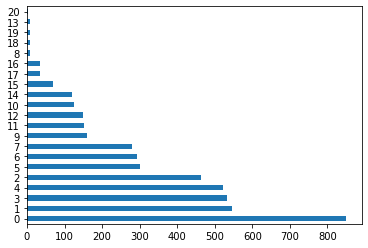

In [14]:
train_data['sub_type'].value_counts().plot(kind='barh')

In [15]:
print(train_data.groupby('sub_type').size().reset_index(name='count'))

    sub_type  count
0          0    849
1          1    545
2          2    464
3          3    532
4          4    521
5          5    300
6          6    293
7          7    280
8          8      9
9          9    160
10        10    125
11        11    153
12        12    150
13        13      8
14        14    121
15        15     70
16        16     34
17        17     36
18        18      8
19        19      8
20        20      2


In [16]:
print(test_data.groupby('sub_type').size().reset_index(name='count'))

    sub_type  count
0          0    209
1          1    130
2          2    119
3          3    140
4          4    121
5          5     89
6          6     75
7          7     68
8          8      2
9          9     20
10        10     33
11        11     37
12        12     49
13        13      5
14        14     21
15        15     20
16        16     12
17        17     12
18        18      2
19        19      2
20        20      2


In [17]:
print(train_data.isnull().values.any())

False


### **토크나이저를 이용한 정수 인코딩**
- 이미 학습해놓은 모델을 사용하다보면 (1)토크나이저, (2)모델 두 가지를 로드해야 한다.

In [18]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.4 MB 4.9 MB/s 
     |████████████████████████████████| 596 kB 73.0 MB/s 
     |████████████████████████████████| 6.6 MB 61.2 MB/s 
     |████████████████████████████████| 101 kB 13.5 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [19]:
import transformers

transformers.__version__

'4.20.1'

In [20]:
from transformers import BertTokenizerFast

tokenizer = BertTokenizerFast.from_pretrained("klue/bert-base") # 사용하고자 하는 모델 이름

Downloading:   0%|          | 0.00/289 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/243k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/483k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/125 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/425 [00:00<?, ?B/s]

In [21]:
# test_data = test_data.dropna(how='any')

print(len(test_data))

1168


In [22]:
X_train_list = train_data['inquiry'].tolist()
X_test_list = test_data['inquiry'].tolist()
y_train = train_data['sub_type'].tolist()
y_test = test_data['sub_type'].tolist()

In [23]:
X_train = tokenizer(X_train_list, truncation=True, padding=True)
X_test = tokenizer(X_test_list, truncation=True, padding=True)

In [24]:
# print(X_train[0].tokens)

In [25]:
print(X_train[0].ids)

[2, 9926, 4318, 3915, 6233, 1506, 2372, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [26]:
print(X_train[0].type_ids)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


> `type_ids`: 풀고자 하는 문제에서 문장 종류의 개수를 의미
> - 일반적으로 2개 이상의 문장을 가지고 푸는 문제일 경우 [0, 0, 0, 0, 1, 1, 1, 1] 이런 식의 값이 들어가지만
> - 네이버 영화 리뷰는 문장 1개를 보고 푸는 문제이므로 [0, 0, 0, 0, 0, 0, 0, 0] 이 들어감


In [27]:
print(X_train[0].attention_mask)

[1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


### **데이터셋 생성 및 모델 학습**

In [28]:
import tensorflow as tf

train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(X_train),
    y_train
))

val_dataset = tf.data.Dataset.from_tensor_slices((
    dict(X_test),
    y_test
))

In [29]:
X_train

Output hidden; open in https://colab.research.google.com to view.

In [30]:
from transformers import TFBertForSequenceClassification
from tensorflow.keras.callbacks import EarlyStopping

In [31]:
optimizer = tf.keras.optimizers.Adam(learning_rate=5e-5)

In [32]:
# loss = model.compute_loss
# loss = tf.keras.losses.CategoricalCrossentropy()

In [33]:
# from_pt=True: 파이토치에서 학습된 모델인데 tf에서 쓰게 하기 위해

model = TFBertForSequenceClassification.from_pretrained("klue/bert-base", num_labels=21, from_pt=True)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Downloading:   0%|          | 0.00/424M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertForSequenceClassification: ['bert.embeddings.position_ids']
- This IS expected if you are initializing TFBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [34]:
# model.compute_loss

In [35]:
callback_earlystop = EarlyStopping(
    monitor="val_accuracy",
    min_delta=0.001,
    patience=2)

model.fit(
    train_dataset.shuffle(10000).batch(32), epochs=5, batch_size=64,
    validation_data = val_dataset.shuffle(10000).batch(64),
    callbacks = [callback_earlystop]
)

Epoch 1/5
146/146 [==============================] - 219s 1s/step - loss: 6.4439 - accuracy: 0.1624 - val_loss: 3.5501 - val_accuracy: 0.0993
Epoch 2/5
146/146 [==============================] - 191s 1s/step - loss: 3.6447 - accuracy: 0.0733 - val_loss: 3.0623 - val_accuracy: 0.1190
Epoch 3/5
146/146 [==============================] - 191s 1s/step - loss: 3.5110 - accuracy: 0.3241 - val_loss: 3.1490 - val_accuracy: 0.5240
Epoch 4/5
146/146 [==============================] - 191s 1s/step - loss: 3.4596 - accuracy: 0.2626 - val_loss: 3.2057 - val_accuracy: 0.2029
Epoch 5/5
146/146 [==============================] - 191s 1s/step - loss: 3.1758 - accuracy: 0.3530 - val_loss: 2.8763 - val_accuracy: 0.5839


In [39]:
model.evaluate(val_dataset.batch(1024))

2/2 [==============================] - 8s 1s/step - loss: 2.8763 - accuracy: 0.5839


[2.8763115406036377, 0.5839040875434875]

### **모델 저장**

In [40]:
model_path = '/content/drive/MyDrive/AIFFELTHON/AIFFELTHON_BBC/Following_bert/bert_model/bert-base'

model.save_pretrained(model_path)
tokenizer.save_pretrained(model_path)

('/content/drive/MyDrive/AIFFELTHON/AIFFELTHON_BBC/Following_bert/bert_model/bert-base/tokenizer_config.json',
 '/content/drive/MyDrive/AIFFELTHON/AIFFELTHON_BBC/Following_bert/bert_model/bert-base/special_tokens_map.json',
 '/content/drive/MyDrive/AIFFELTHON/AIFFELTHON_BBC/Following_bert/bert_model/bert-base/vocab.txt',
 '/content/drive/MyDrive/AIFFELTHON/AIFFELTHON_BBC/Following_bert/bert_model/bert-base/added_tokens.json',
 '/content/drive/MyDrive/AIFFELTHON/AIFFELTHON_BBC/Following_bert/bert_model/bert-base/tokenizer.json')

### **모델 로드 및 테스트**

In [41]:
from transformers import TextClassificationPipeline

# 로드하기
loaded_tokenizer = BertTokenizerFast.from_pretrained(model_path)
loaded_model = TFBertForSequenceClassification.from_pretrained(model_path)

text_classifier = TextClassificationPipeline(
    tokenizer=loaded_tokenizer, 
    model=loaded_model, 
    framework='tf',
    return_all_scores=True
)

Some layers from the model checkpoint at /content/drive/MyDrive/AIFFELTHON/AIFFELTHON_BBC/Following_bert/bert_model/bert-base were not used when initializing TFBertForSequenceClassification: ['dropout_37']
- This IS expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertForSequenceClassification were initialized from the model checkpoint at /content/drive/MyDrive/AIFFELTHON/AIFFELTHON_BBC/Following_bert/bert_model/bert-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForSequen

In [ ]:
# test_data

### **분류 결과 확인**

In [ ]:
# # 정렬 함수

# # 맨 처음에 만든 sub_type_mapping 뒤집기 -> dic.get() 함수 쓰기 위해
# sub_type_mapping_reverse = {v: k for k, v in sub_type_mapping.items()}

# def get_category_name(sentence):
#     rank = {}
#     for i, n in enumerate(text_classifier(sentence)[0]): # 각 라벨 값, 확률값 dictionary로 새로 저장
#         rank[i] = n['score']
    
#     sorted_rank = dict(sorted(rank.items(), reverse=True, key=lambda x: x[1])) # dictionary 내림차순 정렬

#     # sub_category만 보고 싶을 때
#     # for key in sorted_rank.keys():
#     #     print(sub_type_mapping_reverse.get(key)) # 확률값 높은 순대로 sub_category 출력

#     # 확률값까지 보고 싶을 때
#     for key, value in sorted_rank.items():
#         print(sub_type_mapping_reverse.get(key), '  ', value)

In [42]:
# 정렬 함수

# # 맨 처음에 만든 sub_type_mapping 뒤집기 -> dic.get() 함수 쓰기 위해
sub_type_mapping_reverse = {v: k for k, v in sub_type_mapping.items()}

def get_category_name_new(sentence):
    num = len(text_classifier(sentence))

    rank = {}
    for i in range(num):
        rank[i] = text_classifier(sentence)[i]['score']
    
    sorted_rank = dict(sorted(rank.items(), reverse=True, key=lambda x: x[1]))

    for key, value in sorted_rank.items():
        print(sub_type_mapping_reverse.get(key), '  ', value)

In [44]:
get_category_name_new('네비게이션이 안 돼요')

type_1    0.1374172419309616
type_14    0.05914415046572685
type_16    0.056613195687532425
type_17    0.05597787722945213
type_13    0.05326860025525093
type_19    0.05260293558239937
type_21    0.05135404318571091
type_7    0.05092606693506241
type_20    0.04850693419575691
type_9    0.04795575141906738
type_12    0.045873478055000305
type_18    0.04385970160365105
type_15    0.04330596700310707
type_10    0.04319976642727852
type_3    0.04151856154203415
type_2    0.03284351900219917
type_6    0.031746912747621536
type_4    0.03165057301521301
type_11    0.02759561873972416
type_5    0.023006005212664604
type_8    0.021633081138134003


In [45]:
get_category_name_new('타이어가 펑크났어요.')

type_8    0.2106420248746872
type_2    0.15032562613487244
type_4    0.0565357506275177
type_6    0.05305524170398712
type_7    0.04827568307518959
type_5    0.04236028715968132
type_16    0.04008825868368149
type_13    0.03583850339055061
type_3    0.03234142065048218
type_21    0.031502459198236465
type_11    0.03113352134823799
type_20    0.030651601031422615
type_9    0.030452437698841095
type_1    0.028641965240240097
type_17    0.02673615701496601
type_18    0.026379812508821487
type_12    0.026326028630137444
type_15    0.026317983865737915
type_19    0.02519518882036209
type_14    0.02372877486050129
type_10    0.023471489548683167


In [46]:
get_category_name_new('주차 딱지가 붙었는데 어떡하죠?')

type_8    0.1065819263458252
type_6    0.08539516478776932
type_2    0.08323957026004791
type_4    0.07318281382322311
type_7    0.06032475829124451
type_11    0.05809498205780983
type_3    0.05765468627214432
type_5    0.05235005170106888
type_9    0.03982838615775108
type_12    0.03885273635387421
type_13    0.03701059892773628
type_1    0.03694791719317436
type_18    0.035781946033239365
type_21    0.03529807925224304
type_20    0.033521417528390884
type_16    0.032229721546173096
type_15    0.029725920408964157
type_17    0.02971685491502285
type_14    0.02897048369050026
type_10    0.024530403316020966
type_19    0.020761510357260704


In [47]:
get_category_name_new('자동차 전기 충전이 안 돼요 ㅠㅠ')

type_4    0.12466958165168762
type_11    0.07414695620536804
type_8    0.06290841102600098
type_7    0.05963123217225075
type_12    0.05775874853134155
type_9    0.051092151552438736
type_6    0.04895598813891411
type_18    0.04645257443189621
type_3    0.04189351946115494
type_1    0.04017164185643196
type_15    0.039927881211042404
type_2    0.03862154483795166
type_16    0.03827359899878502
type_5    0.037093035876750946
type_10    0.03612789139151573
type_21    0.03590169921517372
type_13    0.03578214719891548
type_19    0.033669594675302505
type_20    0.03289970010519028
type_17    0.03271828964352608
type_14    0.03130388632416725


In [48]:
get_category_name_new('충전기')

type_4    0.11799746751785278
type_12    0.0667552798986435
type_7    0.058977097272872925
type_18    0.05614294856786728
type_11    0.053236670792102814
type_16    0.047047972679138184
type_3    0.04662732034921646
type_9    0.0457732193171978
type_6    0.0442410409450531
type_1    0.04408144950866699
type_10    0.04323619604110718
type_15    0.041903987526893616
type_2    0.04118158668279648
type_13    0.04045359790325165
type_14    0.037850551307201385
type_20    0.03729906305670738
type_21    0.03629384562373161
type_17    0.035930901765823364
type_19    0.03509574010968208
type_5    0.03503628820180893
type_8    0.034837763756513596


In [49]:
get_category_name_new('라이트가 안들어와요')

type_3    0.11453761905431747
type_12    0.07790865749120712
type_7    0.07405678927898407
type_4    0.06292693316936493
type_5    0.061069004237651825
type_1    0.05841002240777016
type_6    0.054164789617061615
type_8    0.05104340612888336
type_9    0.049126774072647095
type_21    0.04200528934597969
type_18    0.03879307582974434
type_20    0.038195494562387466
type_14    0.03700203821063042
type_13    0.03652786836028099
type_2    0.03574153035879135
type_16    0.030821101740002632
type_11    0.02916068397462368
type_17    0.028980068862438202
type_10    0.02840292453765869
type_15    0.026923760771751404
type_19    0.02420218102633953


In [50]:
get_category_name_new('후방 카메라가 망가졌나봐요')

type_12    0.15836483240127563
type_9    0.058416739106178284
type_8    0.052954744547605515
type_20    0.049742691218853
type_1    0.04793575406074524
type_21    0.04734626039862633
type_3    0.04720033332705498
type_6    0.04631497710943222
type_13    0.045979853719472885
type_18    0.04369877651333809
type_7    0.042538754642009735
type_4    0.04218597710132599
type_19    0.04045988619327545
type_5    0.03911683335900307
type_17    0.035957060754299164
type_10    0.035891398787498474
type_14    0.03507058694958687
type_16    0.03473016247153282
type_2    0.03286086767911911
type_15    0.03194214776158333
type_11    0.03129124641418457


In [51]:
get_category_name_new('차량 내부가 더러워요')

type_8    0.10515670478343964
type_6    0.09206705540418625
type_4    0.08649369329214096
type_7    0.08303854614496231
type_2    0.07767006009817123
type_3    0.05720636621117592
type_1    0.040452830493450165
type_18    0.03937459737062454
type_9    0.037503983825445175
type_20    0.03711193427443504
type_12    0.03683706000447273
type_14    0.0367269441485405
type_13    0.03591111674904823
type_5    0.03447834029793739
type_16    0.033829983323812485
type_11    0.03289378806948662
type_21    0.029209110885858536
type_17    0.02757151797413826
type_19    0.026306569576263428
type_15    0.025716356933116913
type_10    0.024443471804261208


In [52]:
get_category_name_new('내비게이션 와이파이가 잘 안됩니다')

type_1    0.13339979946613312
type_17    0.058238741010427475
type_7    0.057854898273944855
type_16    0.05662227421998978
type_21    0.05582135170698166
type_19    0.0516597256064415
type_12    0.05012838914990425
type_14    0.04915991798043251
type_13    0.047391463071107864
type_18    0.04725903645157814
type_9    0.044913239777088165
type_20    0.04436855390667915
type_10    0.04341350495815277
type_3    0.04209199920296669
type_15    0.041485901921987534
type_2    0.03503227233886719
type_4    0.03358505293726921
type_11    0.028681788593530655
type_5    0.028206927701830864
type_6    0.027734287083148956
type_8    0.02295086532831192


In [53]:
get_category_name_new('브레이크가 잘 안 눌려요')

type_4    0.07040367275476456
type_8    0.0657307505607605
type_2    0.06446373462677002
type_6    0.058460962027311325
type_7    0.056218381971120834
type_16    0.053622666746377945
type_21    0.0534241609275341
type_14    0.05123455077409744
type_3    0.048072539269924164
type_13    0.04633987694978714
type_9    0.04514496400952339
type_18    0.04502511024475098
type_20    0.044317349791526794
type_1    0.043618474155664444
type_12    0.042308878153562546
type_5    0.040519699454307556
type_10    0.036886028945446014
type_17    0.03665721416473389
type_15    0.03585300222039223
type_19    0.0321703739464283
type_11    0.029527580365538597


In [54]:
get_category_name_new('경고등이 깜빡깜빡 거립니다')

type_5    0.18327099084854126
type_3    0.144614577293396
type_8    0.11483995616436005
type_2    0.05943482369184494
type_7    0.049923885613679886
type_12    0.03820046782493591
type_6    0.03620458394289017
type_4    0.03474188223481178
type_21    0.03426557034254074
type_9    0.03266880661249161
type_13    0.031729090958833694
type_17    0.026823177933692932
type_15    0.02642846293747425
type_11    0.026399217545986176
type_10    0.026187563315033913
type_14    0.02481195144355297
type_16    0.02447054535150528
type_20    0.023543912917375565
type_1    0.02318461798131466
type_18    0.019932599738240242
type_19    0.018323244526982307
